# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     870.9
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.63e-40
Time:                        18:29:05   Log-Likelihood:                0.31123
No. Observations:                  50   AIC:                             7.378
Df Residuals:                      46   BIC:                             15.03
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0768      0.085     59.411      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.6057163   5.10450369  5.5596646   5.93998696  6.22552296  6.41086645
  6.50604112  6.53485367  6.53098242  6.53244406  6.57534762  6.68796184
  6.88607073  7.17038027  7.52640243  7.92683552  8.33604977  8.71594121
  9.03219203  9.25990891  9.38771293  9.41960908  9.37432825  9.2822498
  9.18041035  9.10641869  9.09227686  9.15912222  9.3137547   9.54751957
  9.83772937 10.15139142 10.45062842 10.69890157 10.86701382 10.93790682
 10.9094636  10.79485634 10.62038228 10.42114308 10.23527779 10.09769666
 10.0343455  10.05794287 10.16589046 10.34069994 10.55286629 10.76571539
 10.94142945 11.04726036]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.05013485 10.90381379 10.63075662 10.28214557  9.92535446  9.62745324
  9.43878693  9.3806494   9.44006988  9.57298869]


## Plot comparison

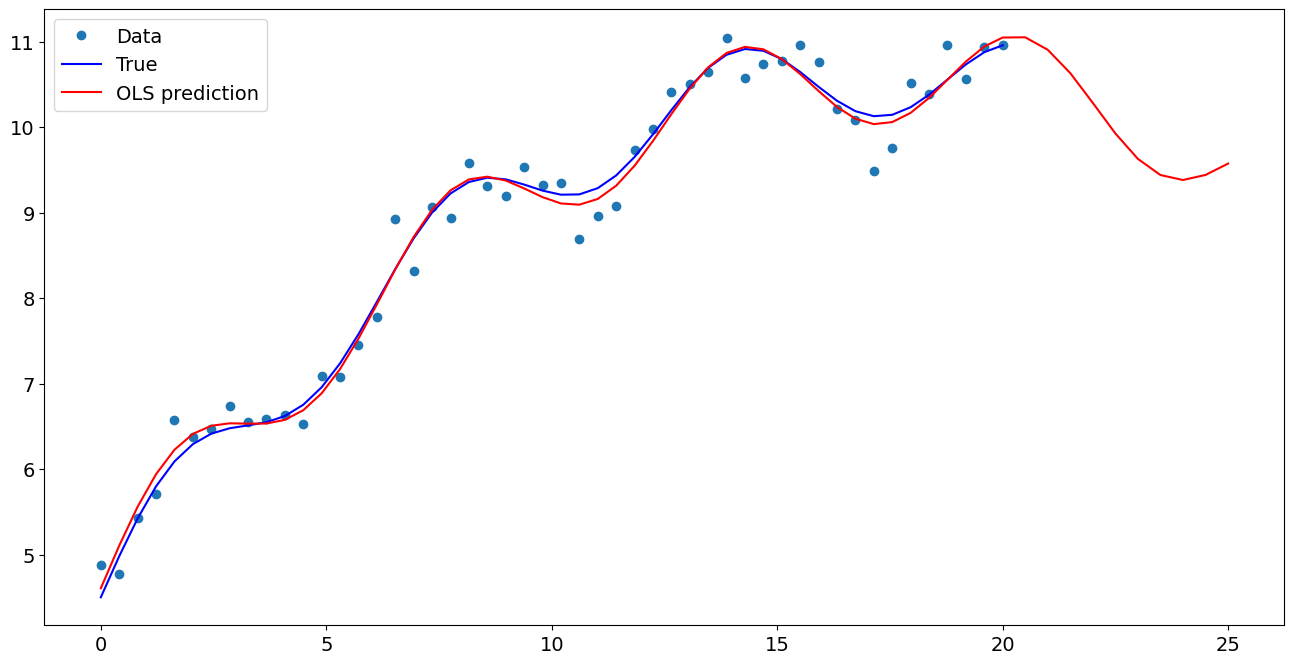

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.076775
x1                  0.484358
np.sin(x1)          0.572708
I((x1 - 5) ** 2)   -0.018842
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.050135
1    10.903814
2    10.630757
3    10.282146
4     9.925354
5     9.627453
6     9.438787
7     9.380649
8     9.440070
9     9.572989
dtype: float64